<a href="https://colab.research.google.com/github/RepnaiaE/DataScience_functional-state-analysis/blob/main/Study_of_non_linear_heart_rate_dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №2
## Исследование нелинейной динамики сердечного ритма/Study of non-linear heart rate dynamics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, CubicSpline

## Чтение данных/Read data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ИТМО/Функциональные состояния/Lab2/2_f_2.csv', names = ['data'])
x = data.data.to_numpy()

## Интерполяция данных/Data Interpolation

In [ ]:
y = x
x = list(range(0, len(y)))

cs = CubicSpline(x, y)
delta_t = 0.25
duration = 300

x = list(np.arange(0, 300, delta_t))
x = cs(x)

## Показатель Херста/Hurst exponent

In [ ]:
def calc_RS(x: list[int], N: int):
    # разбивка на окна длиной N
    windows_values = []
    for num_windows in range(len(x) // N):
        left = num_windows * N
        right = min((num_windows + 1) * N, len(x))
        window_values = x[left: right]

        windows_values.append(window_values)

    windows_std = [np.std(v) for v in windows_values] # std for each window

    # набор отклонений
    X_MN = [] # 1d list
    for window_values in windows_values:
        window_mean = np.mean(window_values)
        x_mn = sum([v - window_mean for v in window_values])
        X_MN.append(x_mn)

    # размах отклонений
    R = max(X_MN) - min(X_MN)
    S = np.mean(windows_std) # как правильно считать стандартное отклонение, если надо было считать std по окнам
                             # но R - это одно значение
    S = np.std(x)

    # нормированный размах
    RS = R / S

    return RS

### Для всех возможных значений N до половины длины исходной последовательности/For all possible values ​​of N up to half the length of the original sequence

In [ ]:
N = list(range(2, len(x) // 2))
RS = []
for n in N:
    RS.append(calc_RS(x, n))

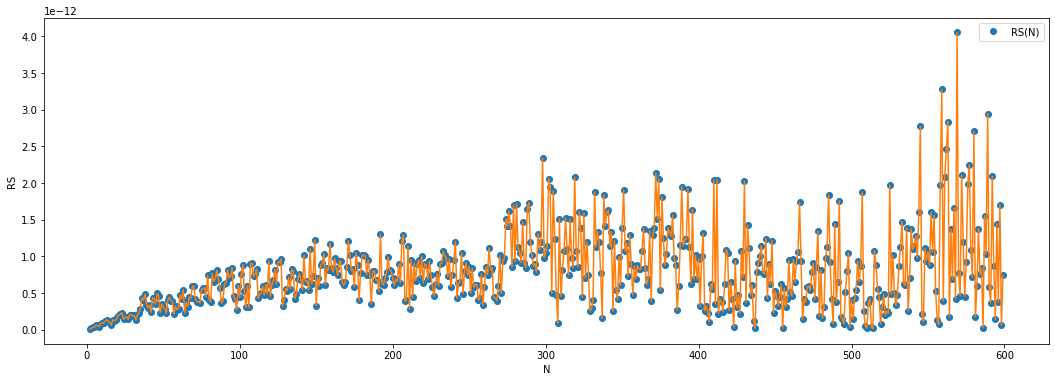

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))

ax.plot(N, RS, 'o', label='RS(N)')
ax.plot(N, RS)

ax.set_xlabel('N')
ax.set_ylabel('RS')
plt.legend(loc='best')

plt.show()

In [ ]:
log_N = np.log(N)
log_RS = np.log(RS)

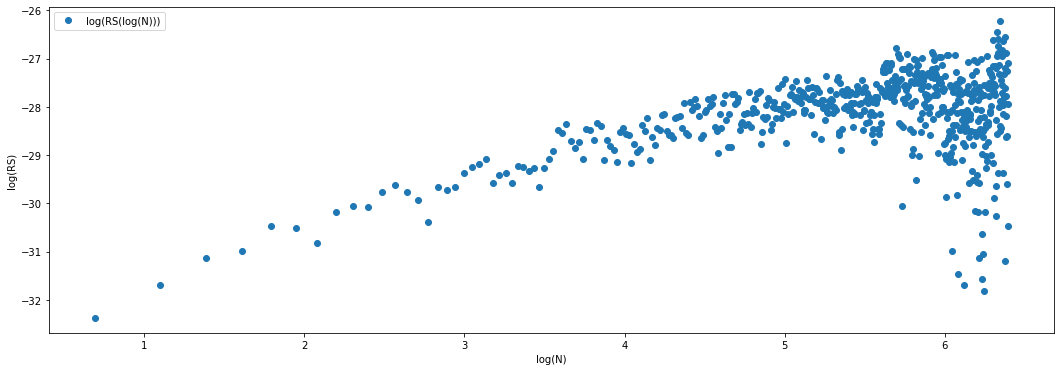

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))

ax.plot(log_N, log_RS, 'o', label='log(RS(log(N)))')
# ax.plot(log_N, log_RS)

ax.set_xlabel('log(N)')
ax.set_ylabel('log(RS)')
plt.legend(loc='best')

plt.show() # разрывы на графике - inf значения (0 для RS)

In [ ]:
log_RS = [v for v in log_RS if not np.isinf(v) and v > -30.0]
log_N = [n for v, n in zip(log_RS, log_N) if not np.isinf(v) and v > -30.0]

In [ ]:
p = np.polyfit(log_N, log_RS, 1)
ya = np.polyval(p, log_N)
p

array([  0.32287105, -29.76250737])

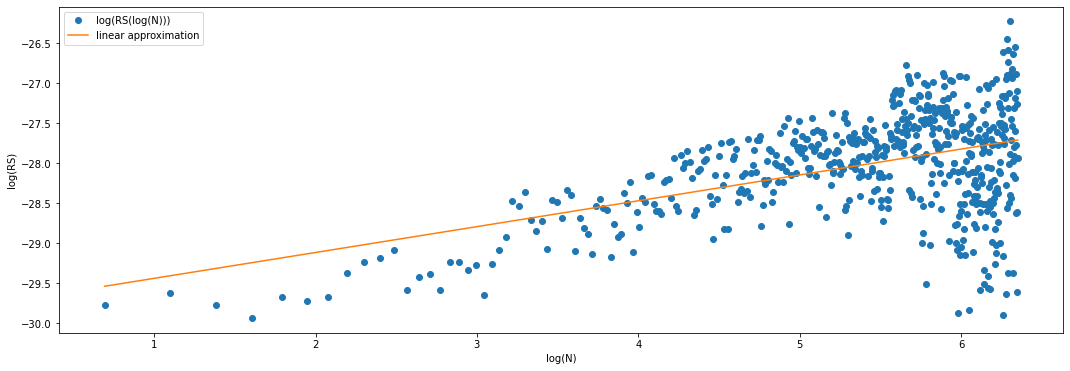

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))

ax.plot(log_N, log_RS, 'o', label='log(RS(log(N)))')
ax.plot(log_N, ya, label='linear approximation')

ax.set_xlabel('log(N)')
ax.set_ylabel('log(RS)')
plt.legend(loc='best')

plt.show()

In [ ]:
H = round(p[0], 2)
print(f'Показатель Херста H = {H}')

Показатель Херста H = 0.32


H < 0.5 -> последовательность не имеет выраженной тенденции, ряд скорее можно назвать антиперсистентным - любая тенденция стремится смениться противоположной.

H < 0.5 -> the sequence does not have a pronounced trend, the series can rather be called antipersistent - any trend tends to be replaced by the opposite one.

### Для меньшего набора значений N (выбирались делители для длины изначальной последовательности)/For a smaller set of values ​​N (divisors were chosen for the length of the original sequence)

In [ ]:
N = [2, 3, 4, 5, 6, 10, 12, 15, 20, 25, 30, 60, 75, 100, 150, 300]
RS = []
for n in N:
    RS.append(calc_RS(x, n))

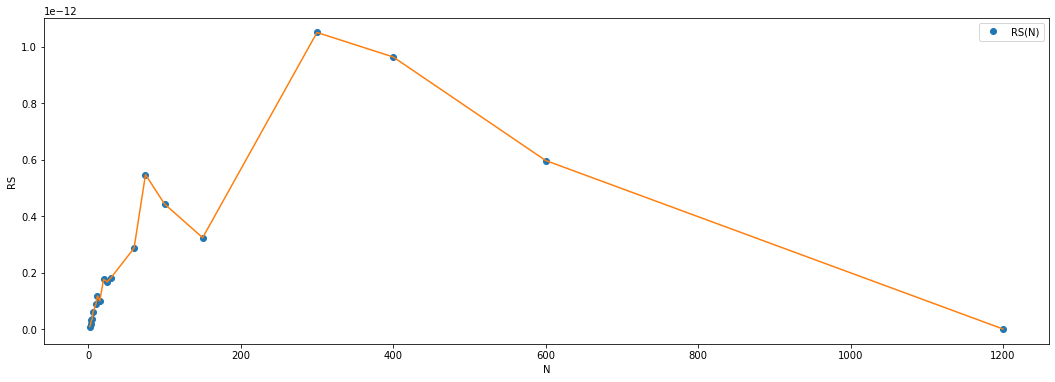

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))

ax.plot(N, RS, 'o', label='RS(N)')
ax.plot(N, RS)

ax.set_xlabel('N')
ax.set_ylabel('RS')
plt.legend(loc='best')

plt.show()

In [ ]:
log_N = np.log(N)
log_RS = np.log(RS)

C:\Users\VOLOSH~1\AppData\Local\Temp/ipykernel_26896/3331872946.py:2: RuntimeWarning: divide by zero encountered in log
  log_RS = np.log(RS)


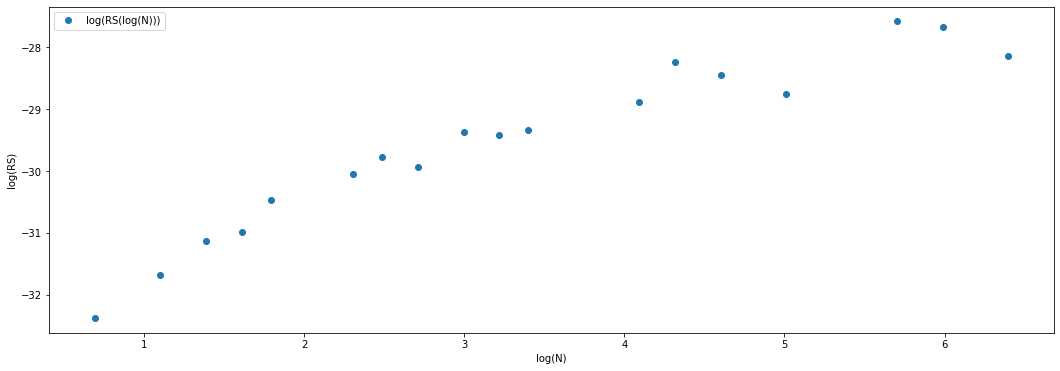

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))

ax.plot(log_N, log_RS, 'o', label='log(RS(log(N)))')
# ax.plot(log_N, log_RS)

ax.set_xlabel('log(N)')
ax.set_ylabel('log(RS)')
plt.legend(loc='best')

plt.show() # разрывы на графике - inf значения (0 для RS)

In [ ]:
log_RS = [v for v in log_RS if not np.isinf(v) and v > -30.0]
log_N = [n for v, n in zip(log_RS, log_N) if not np.isinf(v) and v > -30.0]

In [ ]:
p = np.polyfit(log_N, log_RS, 1)
ya = np.polyval(p, log_N)
p

array([  0.68922329, -30.39126098])

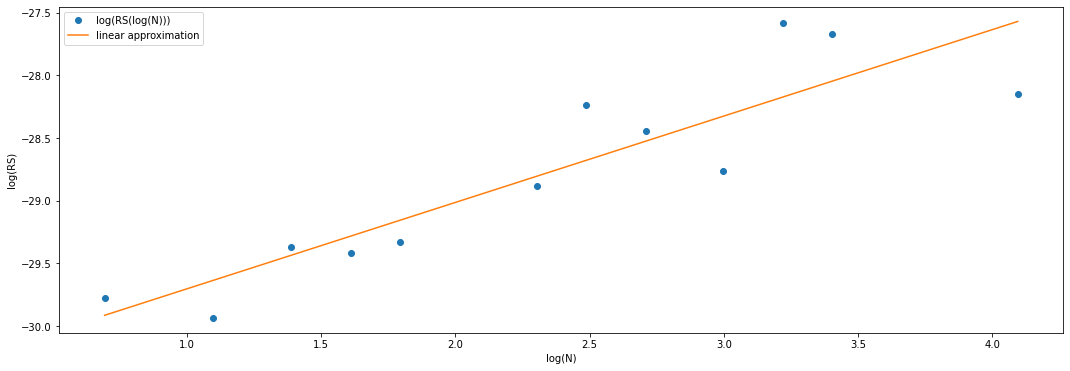

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))

ax.plot(log_N, log_RS, 'o', label='log(RS(log(N)))')
ax.plot(log_N, ya, label='linear approximation')

ax.set_xlabel('log(N)')
ax.set_ylabel('log(RS)')
plt.legend(loc='best')

plt.show()

In [ ]:
H = round(p[0], 2)
print(f'Показатель Херста H = {H}')

Показатель Херста H = 0.69


H > 0.5 -> последовательность является персистентной, то есть возрастание в прошлом более вероятно приводит к возрастанию в дальнейшем, и наоборот.

H > 0.5 -> the sequence is persistent, that is, an increase in the past is more likely to lead to an increase in the future, and vice versa.

## Показатель Херста из библиотеки/Hurst exponent from the library

In [ ]:
!pip install hurst

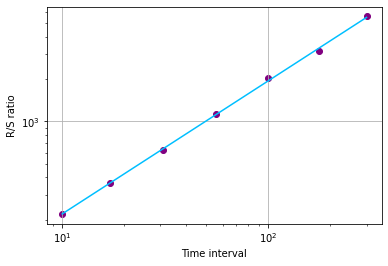

H=0.9450, c=24.9797


In [ ]:
from hurst import compute_Hc

series = pd.read_csv('2_f_2.csv', names = ['data'])

# Evaluate Hurst equation
H, c, data = compute_Hc(series, kind='change')

# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

# Показатель флуктуации/fluctuation index

In [ ]:
def calc_F(x: list[int], L: int):

    x_mean = np.mean(x)

    x = [x[0] - x_mean] + [x[i] + x[i-1] - x_mean for i in range(1, len(x))] # куммулятивные суммы последовательности

    X_t = []
    for num_windows in range(len(x) // L):
        left = num_windows * L
        right = min((num_windows + 1) * L, len(x))
        window_values = x[left: right]

        X_t.append(window_values)

    Z = []
    x_values = list(range(0, L))
    for y_values in X_t:
        windows_interpolation = interp1d(x_values, y_values)
#         windows_interpolation = CubicSpline(x_values, y_values)
        Z.append(windows_interpolation)

#     windows_values = []
#     for num_windows in range(len(x) // L):
#         left = num_windows * L
#         right = min((num_windows + 1) * L, len(x))
#         window_values = x[left: right]

#         windows_values.append(window_values)

#     X_t = [] # 1d list
#     for window_values in windows_values:
#         window_mean = np.mean(window_values)
#         x_t = sum([v - window_mean for v in window_values])
#         X_t.append(x_t)

#     X_t = [X_t[0]] + [X_t[i] + X_t[i-1] for i in range(1, len(X_t))] # куммулятивные суммы для окон

#     Z = []
#     x_values = list(range(0, L))
#     for y_values in windows_values:
#         windows_interpolation = interp1d(x_values, y_values)
# #         windows_interpolation = CubicSpline(x_values, y_values)
#         Z.append(windows_interpolation)

    F_values = []
    for Xt, z, i in zip(X_t, Z, list(range(0, len(X_t)))):
        F = (1/L * sum([(xt - z(i)) ** 2 for i, xt in enumerate(Xt)])) ** (1/2)
        F_values.append(F)

#     F = (1/L * sum([(xt - Z[i](xt)) ** 2 for xt, z in zip(X_t, Z)])) ** (1/2)

#     F = (1/L * sum([(xt - Z[i](xt)) ** 2 for i, xt in enumerate(X_t)])) ** (1/2)

    F = sum(F_values) / len(X_t)

    return F

https://nauchkor.ru/uploads/documents/5f4a920dcd3d3e00017b52aa.pdf

In [ ]:
def calc_F(x: list[int], L: int):
    x_mean = np.mean(x)
    x = [xx - x_mean for xx in x]
    X_t = [x[0]]
    xt_last = x[0]
    for xx in x:
        xt_last += xx
        X_t.append(xt_last)

    windows_values = []
    for num_windows in range(len(X_t) // L):
        left = num_windows * L
        right = min((num_windows + 1) * L, len(X_t))
        window_values = X_t[left: right]

        windows_values.append(window_values)

    Z = []
    x_values = list(range(0, L))
    for y_values in windows_values:
        p = np.polyfit(x_values, y_values, 2)
        z = np.polyval(p, x_values)
        Z.append(z)

    F = (1/L * sum([(xt - z) ** 2 for xt, z in zip(X_t, Z)])) ** (1/2)
#     print(F)

    return sum(F) / len(windows_values)

In [ ]:
L = [2, 3, 4, 5, 6, 10, 12, 15, 20, 25, 30, 60, 75, 100, 150, 300]
F_values = []
for l in L:
    F_values.append(calc_F(x, l))

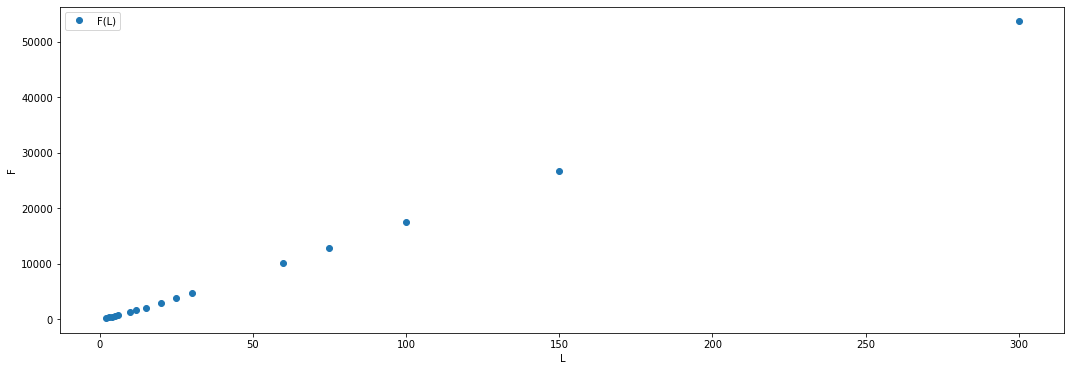

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))

ax.plot(L, F_values, 'o', label='F(L)')
# ax.plot(L, F_values)

ax.set_xlabel('L')
ax.set_ylabel('F')
plt.legend(loc='best')

plt.show()

In [ ]:
log_L = np.log(L)
log_F = np.log(F_values)

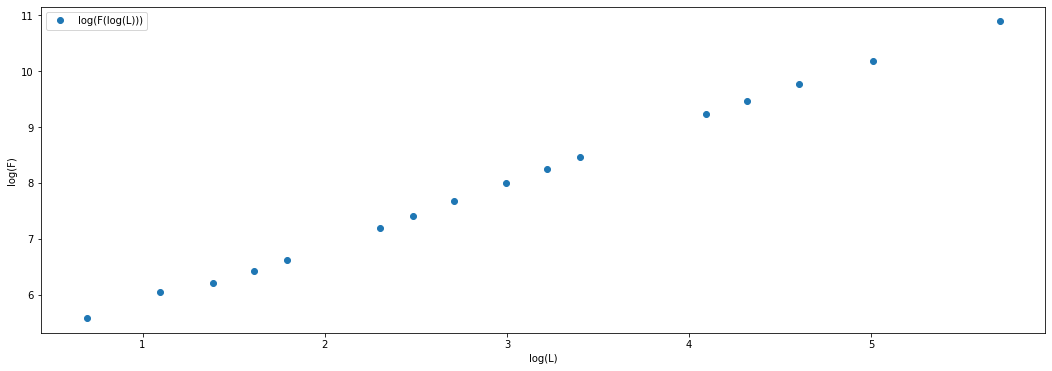

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))

ax.plot(log_L, log_F, 'o', label='log(F(log(L)))')
# ax.plot(log_N, log_F)

ax.set_xlabel('log(L)')
ax.set_ylabel('log(F)')
plt.legend(loc='best')

plt.show()

In [ ]:
p = np.polyfit(log_L, log_F, 1)
ya = np.polyval(p, log_L)
p

array([1.08336009, 4.75245132])

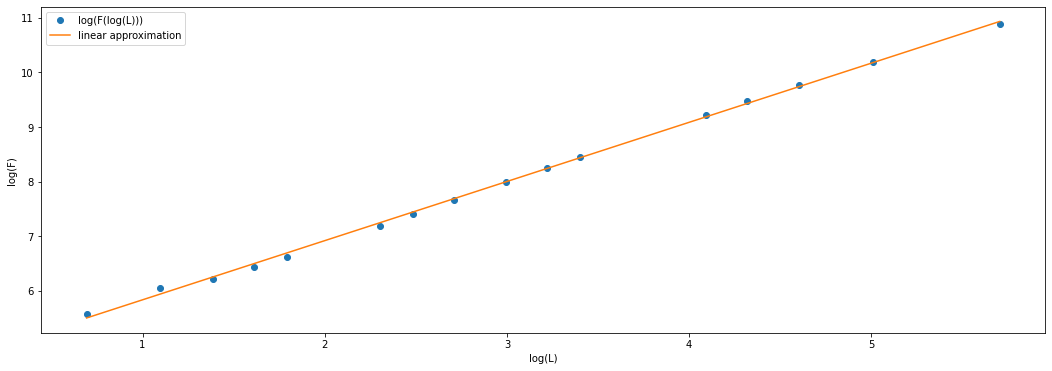

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))

ax.plot(log_L, log_F, 'o', label='log(F(log(L)))')
ax.plot(log_L, ya, label='linear approximation')

ax.set_xlabel('log(L)')
ax.set_ylabel('log(F)')
plt.legend(loc='best')

plt.show()

In [ ]:
alpha = round(p[0], 2)
alpha

1.08

В зависимости от структуры исследуемого процесса показатель флуктуации α может
принимать различные значения в диапазоне от 0 до 1,5; так для случая белого шума α=0,5,
при преобладании розового шума в изучаемом процессе α возрастает до 1, в случае
броуновского процесса – до 1,5.

Depending on the structure of the process under study, the fluctuation index α can take on different values ​​in the range from 0 to 1.5; so for the case of white noise α = 0.5, with the predominance of pink noise in the process under study, α increases to 1, in the case of a Brownian process - up to 1.5.

α = 1.08 ~ 1 -> преобладание розового шума.

Розовый шум обнаруживается, например, в сердечных ритмах, в графиках электрической активности мозга.

α = 1.08 ~ 1 -> pink noise prevails.

Pink noise is found, for example, in heart rhythms, in graphs of the electrical activity of the brain.